In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [ ]:
uploaded_file = files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [ ]:
import os
import io

# Read the uploaded CSV file into a Pandas DataFrame
uploaded_file_name = list(uploaded_file.keys())[0]
try:
  df = pd.read_csv(io.BytesIO(uploaded_file[uploaded_file_name]), encoding='utf-8')
except UnicodeDecodeError:
   df = pd.read_csv(io.BytesIO(uploaded_file[uploaded_file_name]), encoding='latin-1')

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df['InvoiceDate'].unique()

array(['2010-12-01T08:26:00.000000000', '2010-12-01T08:28:00.000000000',
       '2010-12-01T08:34:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Find the monthly sales trends

In [ ]:
# convert the InvoiceDate datatype and store the month and year in different columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Month  Year  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12  2010  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12  2010  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010

In [ ]:
# Create a new df to load month wise data
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

In [ ]:
monthly_sales.head()

Year  Month  Quantity
0  2010     12    342228
1  2011      1    308966
2  2011      2    277989
3  2011      3    351872
4  2011      4    289098

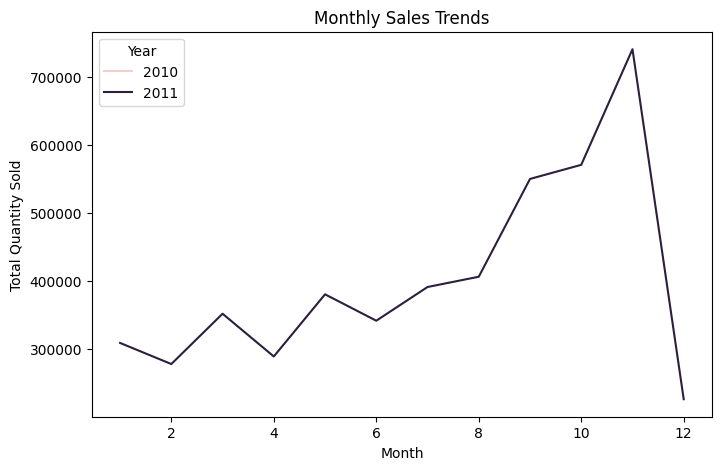

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Quantity', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Month  Year  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12  2010  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12  2010  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010  
Monthly Sales Trends - 2010:
    Year  Month  Quantity
0  2010     12    342228


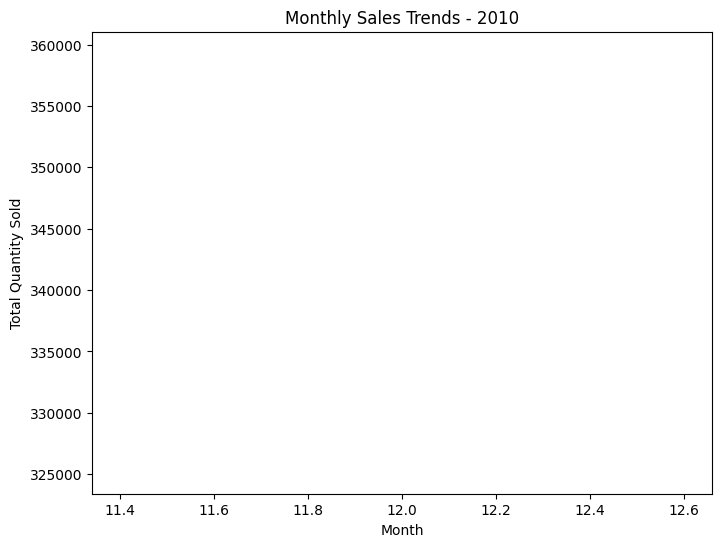

In [ ]:
# Filter data for the year 2010
df_2010 = df[df['Year'] == 2010]

print("\n", df_2010.head())

# Monthly Sales Trends for the year 2010
monthly_sales_2010 = df_2010.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

print("Monthly Sales Trends - 2010:\n", monthly_sales_2010)

plt.figure(figsize=(8, 6))
sns.lineplot(x='Month', y='Quantity', data=monthly_sales_2010)
plt.title('Monthly Sales Trends - 2010')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


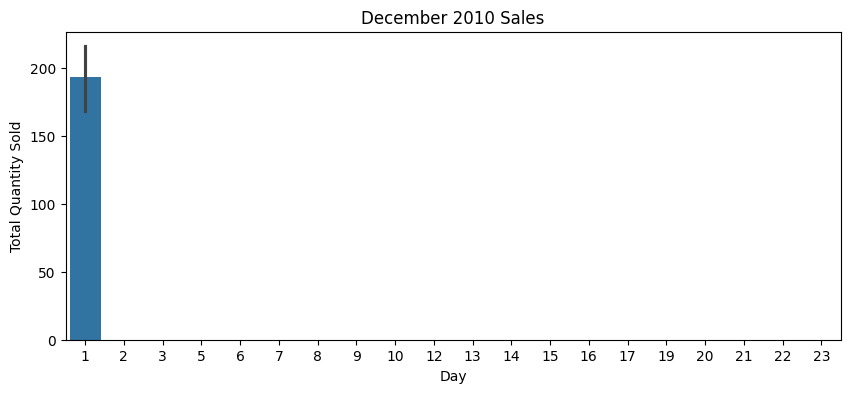

In [ ]:
# Only 12th month data is available of the year of 2010 in the dataframe. plot this data with barplot to find the monthly trend

df_december_2010 = df[(df['Year'] == 2010) & (df['Month'] == 12)]
plt.figure(figsize=(10, 4))
sns.barplot(x=df_december_2010['InvoiceDate'].dt.day, y='Quantity', data=df_december_2010.groupby('InvoiceDate').sum().reset_index())
plt.title('December 2010 Sales')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.show()

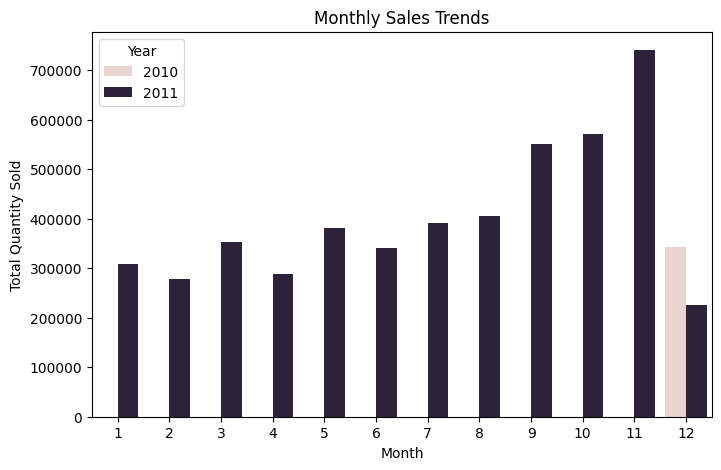

In [ ]:
# Plot barplot for monthly sales df

plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Quantity', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

Country-wise sales

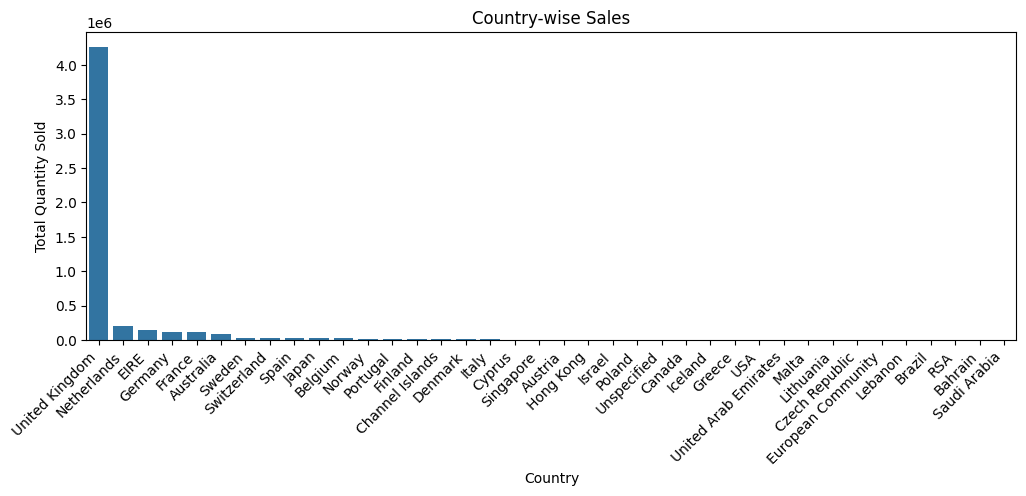

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Country', y='Quantity', data=df.groupby('Country')['Quantity'].
            sum().reset_index().sort_values(by='Quantity', ascending=False))
plt.title('Country-wise Sales')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

Customer-wise Purchasing History

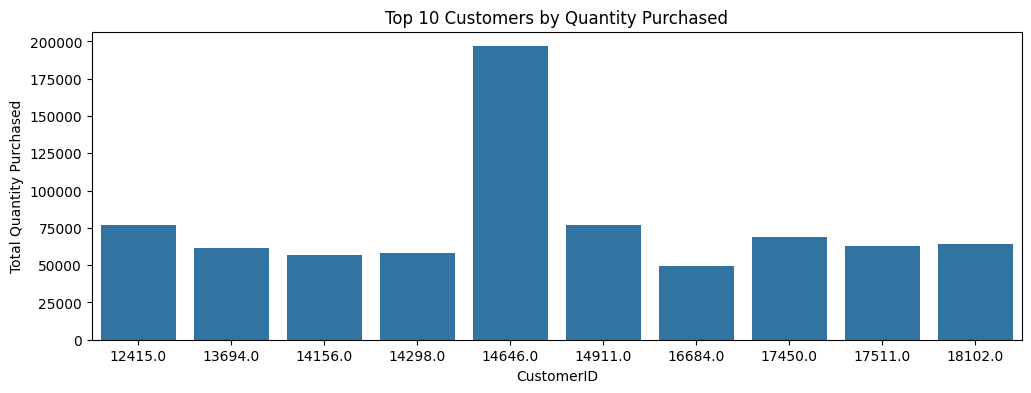

In [ ]:
customer_purchases = df.groupby('CustomerID')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 4))
sns.barplot(x='CustomerID', y='Quantity', data=customer_purchases.sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Customers by Quantity Purchased')
plt.xlabel('CustomerID')
plt.ylabel('Total Quantity Purchased')
plt.show()

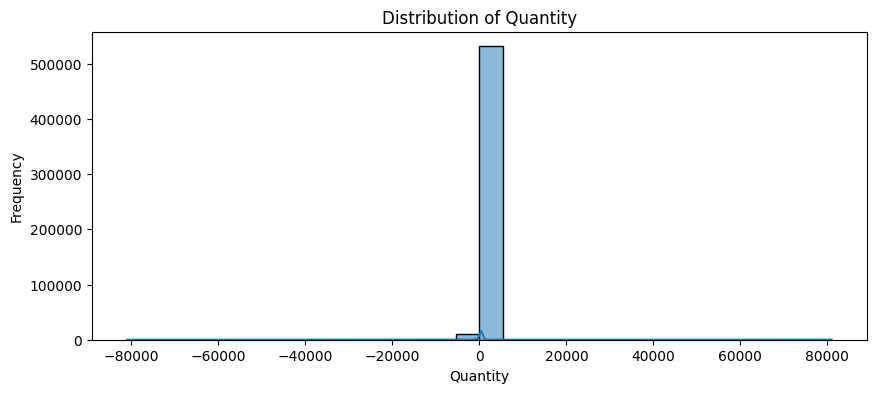

In [ ]:
# Distribution of Quantity
plt.figure(figsize=(10, 4))
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

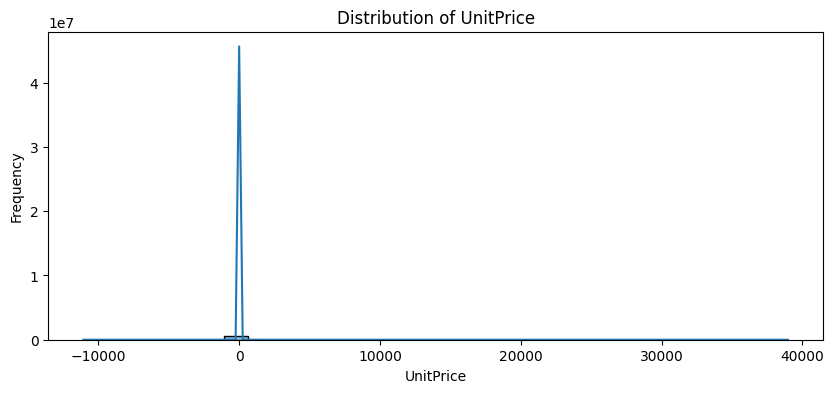

In [ ]:
# Distribution of UnitPrice
plt.figure(figsize=(10, 4))
sns.histplot(df['UnitPrice'], bins=30, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

Top 10 customers coutry wise

In [ ]:
# Group by CustomerID and Country to get total quantity purchased
customer_country_purchases = df.groupby(['CustomerID', 'Country'])['Quantity'].sum().reset_index()

# Find the top 10 customers
top_10_customers = customer_country_purchases.groupby('CustomerID')['Quantity'].sum().nlargest(10).index

# Filter data for the top 10 customers
top_10_data = customer_country_purchases[customer_country_purchases['CustomerID'].isin(top_10_customers)]

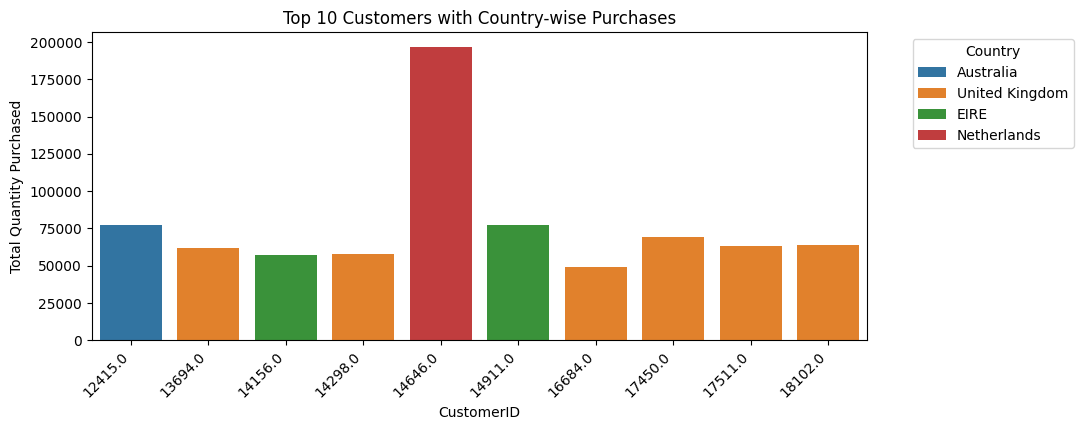

In [ ]:
# Bar plot for top 10 customers with country-wise data
plt.figure(figsize=(10, 4))
sns.barplot(x='CustomerID', y='Quantity', hue='Country', data=top_10_data)
plt.title('Top 10 Customers with Country-wise Purchases')
plt.xlabel('CustomerID')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

We have negative values in the Quantity and UnitPrice column, this may due to the return orders

In [ ]:
# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
# Remove rows with negative Quantity and Price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
# Convert CustomerID to integer

df['CustomerID'] = df['CustomerID'].astype(int)

**RFM Analysis for Customer Segmentation**

In [ ]:
# create a “Total” column that contains Quantity*UnitPrice for all the records

df['Total'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Create a refernce day later than the most recent date from the InvoiceDate

reference_date = max(df['InvoiceDate']) + pd.DateOffset(days=1)

In [ ]:
# Calculate the Recency, Frequency, and MonetaryValue following—grouped by CustomerID

For recency, calculate the difference between the most recent purchase date and a reference date. This gives the number of days since the customer's last purchase.

frequency measures how often a customer makes purchases, calculate it as the total number of unique invoices or transactions made by each customer.

Monetary value quantifies how much money a customer spends. find the average of the total monetary value across transactions.

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total': 'sum'
})

In [ ]:
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Total': 'MonetaryValue'}, inplace=True)
rfm.head()

Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12347             2          7        4310.00
12348            75          4        1797.24
12349            19          1        1757.55
12350           310          1         334.40

Map RFM Values onto a 1-5 Scale


In [ ]:
# Calculate custom bin edges for Recency, Frequency, and Monetary scores
recency_bins = [rfm['Recency'].min()-1, 20, 50, 150, 250, rfm['Recency'].max()]
frequency_bins = [rfm['Frequency'].min() - 1, 2, 3, 10, 100, rfm['Frequency'].max()]
monetary_bins = [rfm['MonetaryValue'].min() - 3, 300, 600, 2000, 5000, rfm['MonetaryValue'].max()]

In [ ]:
# Calculate Recency score based on custom bins
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=recency_bins, labels=range(1, 6), include_lowest=True)

# Reverse the Recency scores so that higher values indicate more recent purchases
rfm['R_Score'] = 5 - rfm['R_Score'].astype(int) + 1

# Calculate Frequency and Monetary scores based on custom bins
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=range(1, 6), include_lowest=True).astype(int)
rfm['M_Score'] = pd.cut(rfm['MonetaryValue'], bins=monetary_bins, labels=range(1, 6), include_lowest=True).astype(int)

In [ ]:
# Print the first few rows of the RFM DataFrame to verify the scores
print(rfm[['R_Score', 'F_Score', 'M_Score']].head(10))

            R_Score  F_Score  M_Score
CustomerID                           
12346             1        1        5
12347             5        3        4
12348             3        3        3
12349             5        1        3
12350             1        1        2
12352             4        3        4
12353             2        1        1
12354             2        1        3
12355             2        1        2
12356             4        2        4


Use **K-Means Clustering** to identify segments with similar RFM characteristics

In [ ]:
# Extract the R, F, and M scores to perform K-Means clustering

X = rfm[['R_Score', 'F_Score', 'M_Score']]

Find the optimal number of clusters using elbow method

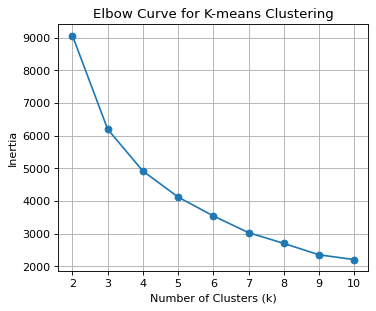

In [ ]:
# Calculate inertia for different values of k

from sklearn.cluster import KMeans

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(5, 4),dpi=80)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

the curve elbows out at 4 clusters

In [ ]:
# Perform K-means clustering with best K
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = best_kmeans.fit_predict(X)

characterize the clusters based on the RFM scores

In [ ]:
# Group by cluster and calculate mean values
cluster_summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [ ]:
print(cluster_summary)

   Cluster   R_Score   F_Score   M_Score
0        0  4.669811  3.188679  3.764151
1        1  3.027290  1.893762  3.115984
2        2  1.442263  1.061201  1.505774
3        3  3.878194  1.083475  1.602215


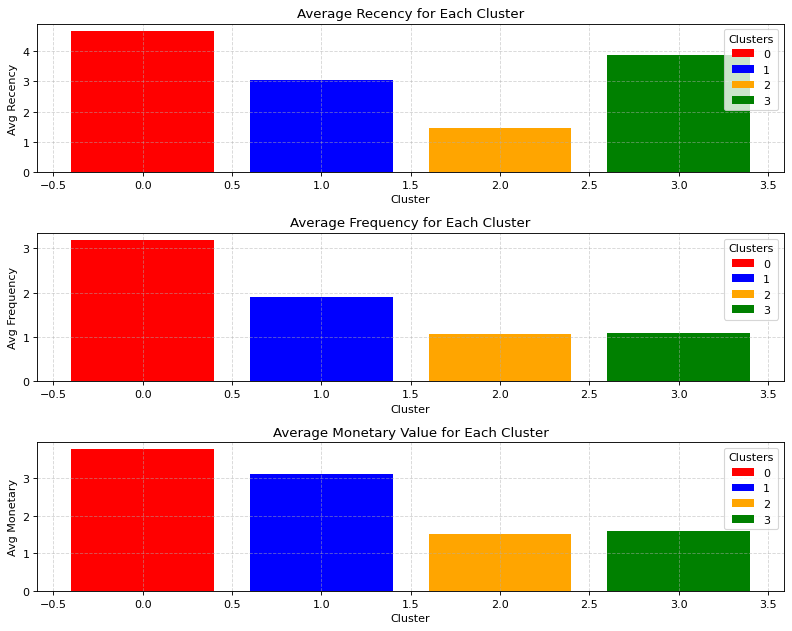

In [ ]:
colors = ['Red', 'Blue', 'Orange','Green']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=80)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()

**Chategorise the Customers based on the clusters**

Cluster 0: Power Shoppers - Of all the four clusters, this cluster has the highest recency, frequency, and monetary values.

Cluster 1: Loyal Customers - This cluster is characterized by moderate recency, frequency, and monetary values. These customers still spend more and purchase more frequently than clusters 2 and 3.

Cluster 2: Inactive Customers - Customers in this cluster tend to spend less. They don’t buy often, and haven’t made a purchase recently either.

Cluster 3: Long Term Customers - This cluster is characterized by high recency and relatively lower frequency and moderate monetary values. So these are recent customers who can potentially become long-term customers.

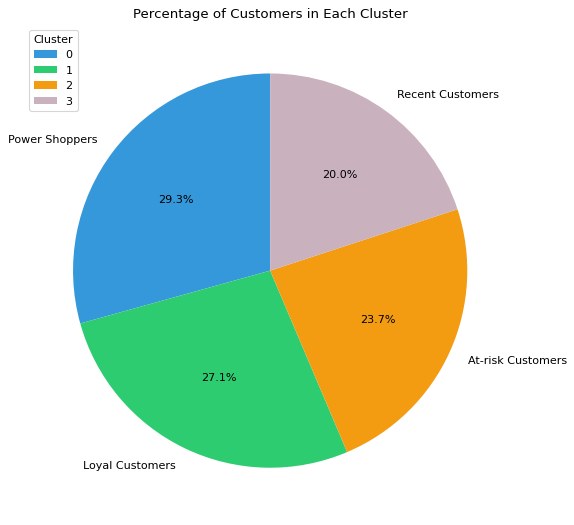

In [ ]:
# Create pie chart to visualize the clusters

cluster_counts = rfm['Cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Power Shoppers','Loyal Customers','At-risk Customers','Recent Customers']

# Create a pie chart
plt.figure(figsize=(8, 8),dpi=80)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['Cluster'], title='Cluster', loc='upper left')

plt.show()